<a href="https://colab.research.google.com/github/azizi191003/DeepLearning/blob/main/Week1_Infrared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Buat model Deep learning (PyTorch and Tensorflow). Target variable aveOralM.
2. Gunakan Matriks Evaluasi (RMSE,MSE,RSquared)
3. Beri penjelasan untuk setiap persamaan matematika yang ada.

In [16]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Load dataset
df = pd.read_csv("Infrared.csv")

# Handle missing values
df["Distance"].fillna(df["Distance"].median(), inplace=True)

# Convert categorical variables
df = pd.get_dummies(df, columns=["Gender", "Age", "Ethnicity"], drop_first=True)

<ipython-input-17-99791e568050>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Distance"].fillna(df["Distance"].median(), inplace=True)


In [18]:
# Separate features and target
X = df.drop(columns=["aveOralM"])
y = df["aveOralM"]

In [19]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#PyTorch

In [21]:
# Convert to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [22]:
# PyTorch model
class PyTorchModel(nn.Module):
    def __init__(self):
        super(PyTorchModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [23]:

# Initialize and train PyTorch model
model_torch = PyTorchModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_torch.parameters(), lr=0.001)

num_epochs = 100
loss_history = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model_torch(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 1326.8275
Epoch [20/100], Loss: 1280.0524
Epoch [30/100], Loss: 1203.0103
Epoch [40/100], Loss: 1083.3615
Epoch [50/100], Loss: 917.0770
Epoch [60/100], Loss: 726.1446
Epoch [70/100], Loss: 567.4364
Epoch [80/100], Loss: 495.3789
Epoch [90/100], Loss: 475.0493
Epoch [100/100], Loss: 446.9553


In [24]:
# Predictions and evaluation (PyTorch)
y_pred_torch = model_torch(X_test_torch).detach().numpy()
rmse_torch = np.sqrt(mean_squared_error(y_test, y_pred_torch))
mse_torch = mean_squared_error(y_test, y_pred_torch)
r2_torch = r2_score(y_test, y_pred_torch)

#TensorFlow

In [25]:
# Convert to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train.values.reshape(-1, 1), dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test.values.reshape(-1, 1), dtype=tf.float32)


In [26]:
# TensorFlow model
model_tf = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])
model_tf.compile(optimizer='adam', loss='mse', metrics=['mse'])
history = model_tf.fit(X_train_tf, y_train_tf, epochs=num_epochs, verbose=1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1334.5167 - mse: 1334.5167
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1097.1794 - mse: 1097.1794 
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 725.6589 - mse: 725.6589
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 462.3128 - mse: 462.3128 
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 403.4808 - mse: 403.4808 
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 299.1566 - mse: 299.1566 
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 243.6851 - mse: 243.6851 
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 154.2548 - mse: 154.2548 
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 102.5554 - mse: 102.5554 
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57.0711 - mse: 57.0711 
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.6083 - mse: 42.6083 
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.9156 - mse: 27

In [27]:
# Predictions and evaluation (TensorFlow)
y_pred_tf = model_tf.predict(X_test_tf)
rmse_tf = np.sqrt(mean_squared_error(y_test, y_pred_tf))
mse_tf = mean_squared_error(y_test, y_pred_tf)
r2_tf = r2_score(y_test, y_pred_tf)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [28]:
# Print results
print(f"PyTorch - RMSE: {rmse_torch}, MSE: {mse_torch}, R2: {r2_torch}")
print(f"TensorFlow - RMSE: {rmse_tf}, MSE: {mse_tf}, R2: {r2_tf}")

PyTorch - RMSE: 20.687351584686343, MSE: 427.9665155884246, R2: -2031.3986083492487
TensorFlow - RMSE: 1.1515391222534326, MSE: 1.3260423500802059, R2: -5.297330582533246


berdasarkan hasil evaluasi model diatas, pada RMSE untuk model Pytorch  mendapatkan hasil sebesaar 21.02 yang dimana menunjukan tingkat kesalahan yang tinggi sedangkan untuk model Tensorflow mendapatkan hadil 1.15 yang lebih kecil dan menunjukan hasil prediksi yang lebih akurat dibandingkan PyTorch dimana RMSE sendiri mengukur akar dari rata-rata kuadrat selisih nilai aktual dan nilai prediksi. semakin kecil hasil prediksi maka akan mendekati nilai aktualnya.  

Pada MSE untuk model PyTorch mendapatkan hasil 441.93 yang menunjukan bahwa model memiliki prediksi yang buurk sedangkan untuk model Tensorflow mendapatkan hasil 1.31 bahwa model lebih baik dibandingkan PyTorch dimana MSE merupakan kuadrat dari RMSE yang cukup sensitif dengan outlier.

Pada R² untuk model PyTorch mendapatkan hasil sebesar -2097.71 yang menunjukan model sangat buruk dan untuk model Tensorflow mendapatkan hasil sebesar -5.24 yang termasuk buruk tetapi lebih baik daripada PyTorch, dimana R² mengukur seberapa baik model menjelaskan variabilitas dalam sebuah data dimana jika hasil negatif menunjukan model gagal dalam memprediksi


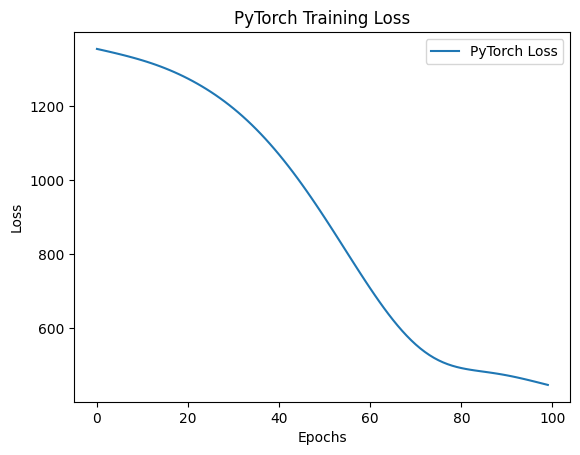

In [29]:
# Plot loss history for PyTorch
import matplotlib.pyplot as plt
plt.plot(range(num_epochs), loss_history, label='PyTorch Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('PyTorch Training Loss')
plt.legend()
plt.show()


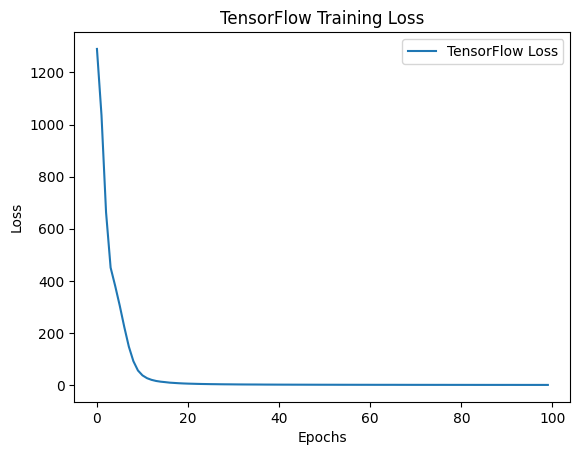

In [30]:
# Plot loss history for TensorFlow
plt.plot(history.history['loss'], label='TensorFlow Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('TensorFlow Training Loss')
plt.legend()
plt.show()

berdasarkan 2 grafik diatas pada sumbu-x merupakan epoch yang menunjukan jumlah iterasi pelatihan dimana semakin banyak epoch semakin lama model melatih dan sumbu-y merupakan loss diaman menunjukan nilai fungsi loss atau kesalahan prediksi model pada setiap iterasi epoch. pada grafik tersebut dapat dilihat untuk pola penurunan loss pada PyTorch menurun secara bertahap dengan kurva yang melandai setelah epoch 60 dimana model belajar dengan kecepatan yang stabil. pada Tensorflow loss turun sangat tajam dalam 20 epoch pertama lalu stabil mendekati 0 dimana model sangat cepat dalam belajar pola data dan konvergen lebih cepat.

Dapat disimpulkan bahwa Tensorflow lebih cepat belajar tetapi ada risiko overfitting jika loss terlalu cepat mendekati 0, sedangkan PyTorch lebih stabil tetapi memerlukan lebih banyak epoch atau tunning hyperparamater agr lebih optimal